## Задание 1.1: Построение интерполяционного многочлена Лагранжа
1. Выбор 5 точек в пределах $x \in [-1, 1] $, $ y \in [0, 1] $.
2. Реализация многочлена Лагранжа.

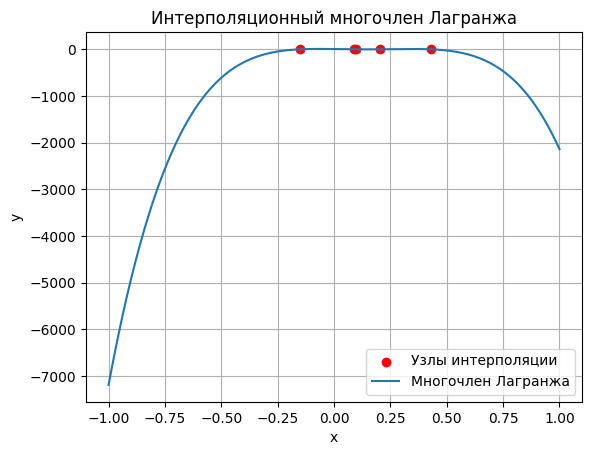

Построенный многочлен имеет степень: 4


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange_polynomial(x, y, t):
    """
    Вычисление интерполяционного многочлена Лагранжа.
    x, y: массивы узлов интерполяции
    t: точка или массив точек, где вычисляется значение многочлена
    """
    n = len(x)
    result = 0
    for i in range(n):
        term = y[i]
        for j in range(n):
            if i != j:
                term *= (t - x[j]) / (x[i] - x[j])
        result += term
    return result


np.random.seed(0)  # якорь для рандомайзера
x_points = np.random.uniform(-1, 1, 5)
y_points = np.random.uniform(0, 1, 5)


t = np.linspace(-1, 1, 500)
lagrange_values = lagrange_polynomial(x_points, y_points, t)


plt.scatter(x_points, y_points, color='red', label='Узлы интерполяции')
plt.plot(t, lagrange_values, label='Многочлен Лагранжа')
plt.title("Интерполяционный многочлен Лагранжа")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

print(f"Построенный многочлен имеет степень: {len(x_points) - 1}")

## Задание 1.2: Аппроксимация функции $$f(x) = \frac{1}{1 + d \cdot x^2}$$

2а. Равномерное разбиение

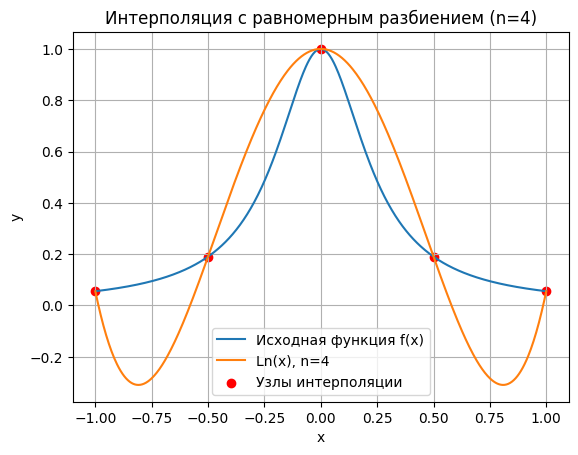

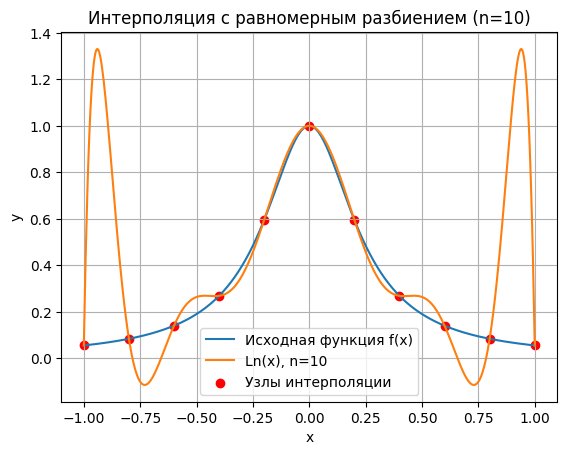

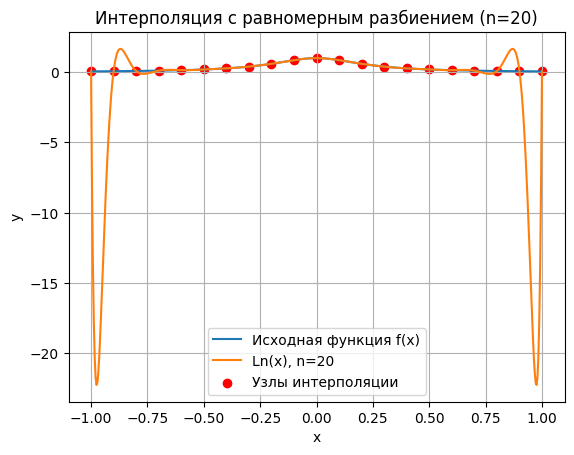

In [5]:
def f(x, d):
    """Заданная функция f(x)."""
    return 1 / (1 + d * x**2)

def uniform_nodes(n):
    """Создание равномерного разбиения для n узлов."""
    h = 2 / n
    return np.array([-1 + i * h for i in range(n + 1)])

# Параметры задачи
k = 7
d = 10 + k
n_values = [4, 10, 20]

for n in n_values:
    x_uniform = uniform_nodes(n)
    y_uniform = f(x_uniform, d)
    lagrange_values_uniform = lagrange_polynomial(x_uniform, y_uniform, t)

    # Построение графика
    plt.plot(t, f(t, d), label="Исходная функция f(x)")
    plt.plot(t, lagrange_values_uniform, label=f"Ln(x), n={n}")
    plt.scatter(x_uniform, y_uniform, color='red', label='Узлы интерполяции')
    plt.title(f"Интерполяция с равномерным разбиением (n={n})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid()
    plt.show()


2б. Узлы Чебышёва

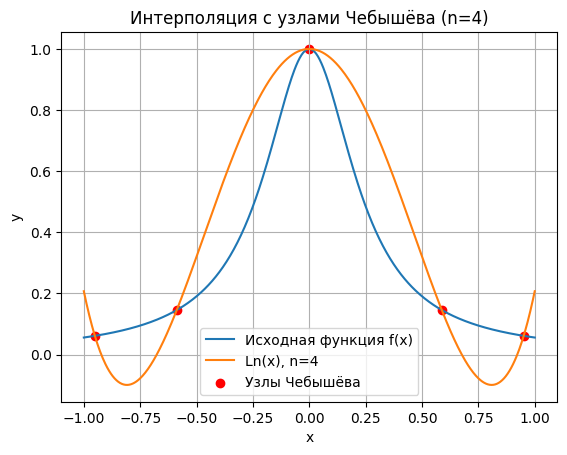

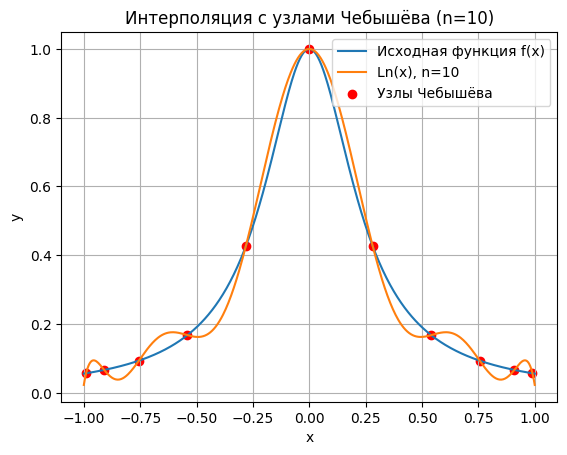

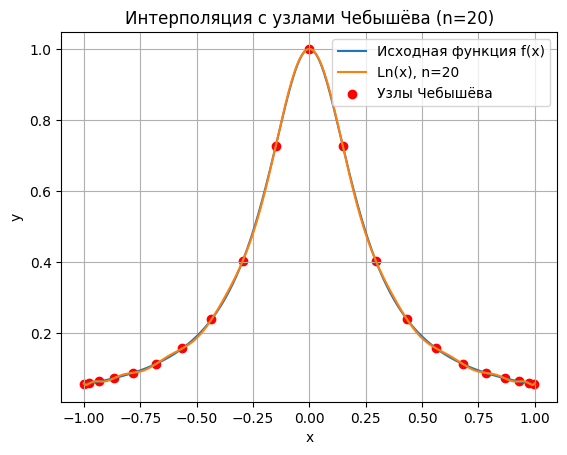

In [6]:
def chebyshev_nodes(n):
    """Создание узлов Чебышёва для n узлов."""
    N = 2 * (n + 1)
    return np.array([np.cos((2 * i + 1) * np.pi / N) for i in range(n + 1)])

for n in n_values:
    x_chebyshev = chebyshev_nodes(n)
    y_chebyshev = f(x_chebyshev, d)
    lagrange_values_chebyshev = lagrange_polynomial(x_chebyshev, y_chebyshev, t)

    # Построение графика
    plt.plot(t, f(t, d), label="Исходная функция f(x)")
    plt.plot(t, lagrange_values_chebyshev, label=f"Ln(x), n={n}")
    plt.scatter(x_chebyshev, y_chebyshev, color='red', label='Узлы Чебышёва')
    plt.title(f"Интерполяция с узлами Чебышёва (n={n})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid()
    plt.show()


In [7]:
# Проверка для равномерного разбиения
for n in n_values:
    x_uniform = uniform_nodes(n)
    y_uniform = f(x_uniform, d)
    ln_values = lagrange_polynomial(x_uniform, y_uniform, x_uniform)
    print(f"Проверка равномерного разбиения (n={n}): Ln(xi) = f(xi) -> {np.allclose(ln_values, y_uniform)}")

# Проверка для узлов Чебышёва
for n in n_values:
    x_chebyshev = chebyshev_nodes(n)
    y_chebyshev = f(x_chebyshev, d)
    ln_values = lagrange_polynomial(x_chebyshev, y_chebyshev, x_chebyshev)
    print(f"Проверка узлов Чебышёва (n={n}): Ln(xi) = f(xi) -> {np.allclose(ln_values, y_chebyshev)}")


Проверка равномерного разбиения (n=4): Ln(xi) = f(xi) -> True
Проверка равномерного разбиения (n=10): Ln(xi) = f(xi) -> True
Проверка равномерного разбиения (n=20): Ln(xi) = f(xi) -> True
Проверка узлов Чебышёва (n=4): Ln(xi) = f(xi) -> True
Проверка узлов Чебышёва (n=10): Ln(xi) = f(xi) -> True
Проверка узлов Чебышёва (n=20): Ln(xi) = f(xi) -> True


## Задание 2: исследование сходимости интерполяционного процесса для заданной функции

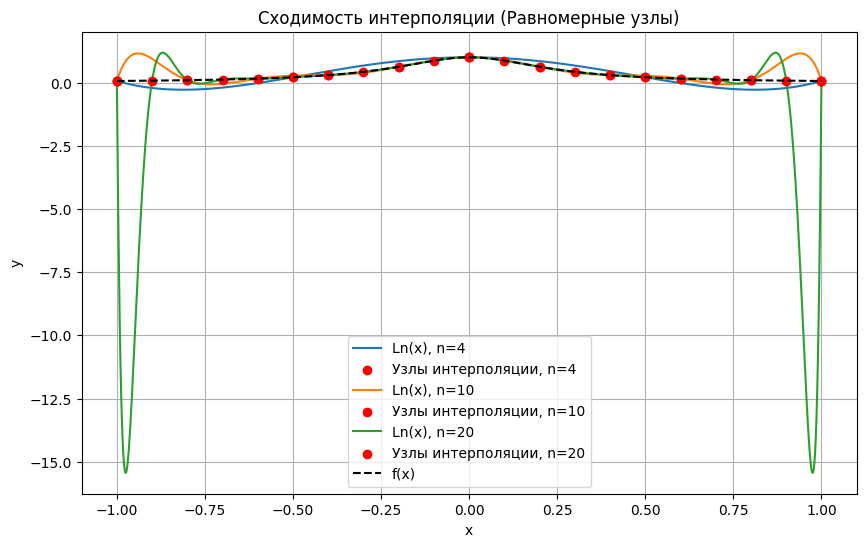

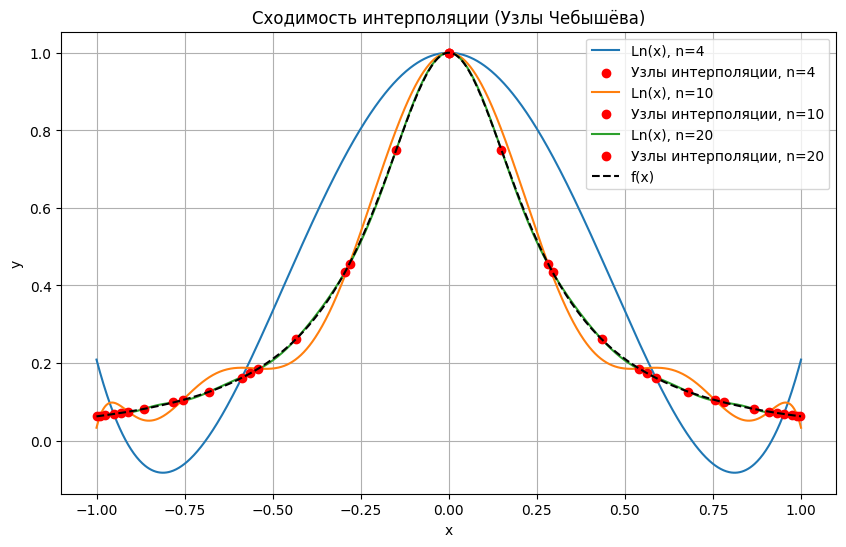

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Заданная функция
def f(x, d):
    """Функция f(x) = 1 / (1 + d * x^2)."""
    return 1 / (1 + d * x**2)

# Интерполяционный многочлен Лагранжа
def lagrange_polynomial(x, y, t):
    """Интерполяция Лагранжа."""
    n = len(x)
    result = 0
    for i in range(n):
        term = y[i]
        for j in range(n):
            if i != j:
                term *= (t - x[j]) / (x[i] - x[j])
        result += term
    return result

# Узлы равномерного разбиения
def uniform_nodes(n, a, b):
    """Создание равномерных узлов."""
    return np.linspace(a, b, n + 1)

# Узлы Чебышёва
def chebyshev_nodes(n, a, b):
    """Узлы Чебышёва для интервала [a, b]."""
    return np.array([0.5 * (a + b) + 0.5 * (b - a) * np.cos((2 * i + 1) * np.pi / (2 * (n + 1))) for i in range(n + 1)])

# Параметры задачи
k = 7  
d = 10 + k
a, b = -1, 1  # Интервал
n_values = [4, 10, 20]

# Исследование для каждой сетки
for method, node_func in [("Равномерные узлы", uniform_nodes), ("Узлы Чебышёва", chebyshev_nodes)]:
    plt.figure(figsize=(10, 6))
    for n in n_values:
        # Генерация узлов и вычисление значений функции
        x_nodes = node_func(n, a, b)
        y_nodes = f(x_nodes, d)

        # Точки для интерполяции
        t = np.linspace(a, b, 1000)
        f_values = f(t, d)
        lagrange_values = lagrange_polynomial(x_nodes, y_nodes, t)

        # Построение графика
        plt.plot(t, lagrange_values, label=f"Ln(x), n={n}")
        plt.scatter(x_nodes, y_nodes, color="red", zorder=5, label=f"Узлы интерполяции, n={n}")

    # График исходной функции
    plt.plot(t, f_values, "k--", label="f(x)", zorder=10)
    plt.title(f"Сходимость интерполяции ({method})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid()
    plt.show()


## Задание 3: исследование сходимости интерполяционного процесса для заданной функции

Сравниваем интерполяционный многочлен Ньютона и Лагранжа для функции, заданной таблично.

-1.52655665885959e-16*x*(x - 0.5)*(x + 0.5)*(x + 1.0) - 0.133333333333333*x*(x + 0.5)*(x + 1.0) + 0.4*x + 0.2*(x + 0.5)*(x + 1.0) + 0.4


<lambdifygenerated-14>:2: RuntimeWarning: divide by zero encountered in divide
  return (-7.40148683083438e-17*x**7 - 0.01875*x**6 + 0.0187500000000001*x**5 + 0.09375*x**4 - 0.0234375*x**3 - 0.092578125*x**2 + 0.0046875*x + 0.017578125)/(0.140625*x**3 - 0.140625*x**2 - 0.03515625*x + 0.03515625)


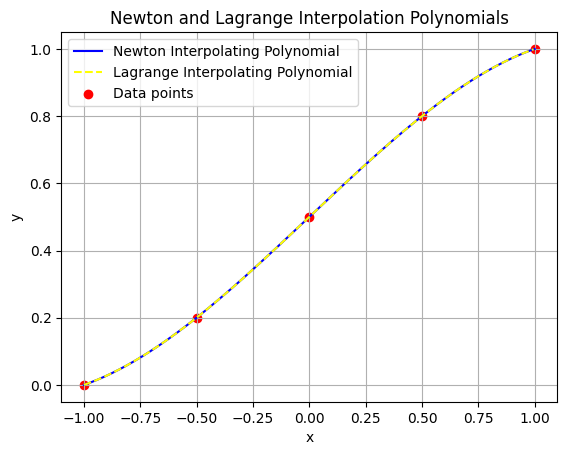

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp


x = sp.symbols("x")


x_numbers = np.array([-1, -0.5, 0, 0.5, 1])
y_numbers = np.array([0, 0.2, 0.5, 0.8, 1])
n = len(x_numbers)

f = np.zeros((5, 5))
for i in range(n):
    f[0][i] = y_numbers[i]

# считаем разделенные разности
for k in range(1, n):
    for i in range(n - k):
        f[k][i] = (f[k - 1][i + 1] - f[k - 1][i]) / (x_numbers[i + k]-x_numbers[i])

# строим интерполяционный многочлен Ньютона
w = 1
N = f[0][0]
for i in range(1, n):
    w *= (x - x_numbers[i - 1])
    N += f[i][0] * w

N_simplified = sp.simplify(N)


# преобразуем его в функцию для вычислений
N_func = sp.lambdify(x, N_simplified, "numpy")


# Лагранжев многочлен
w = sp.prod([x - i for i in x_numbers])
df_w = sp.diff(w)
L = sp.simplify(sum([y_numbers[i] * (w / ((x - x_numbers[i]) * df_w.subs({x: x_numbers[i]}))) 
                     for i in range(n)]))
L_func = sp.lambdify(x, L, "numpy")

# значения x графика
x_vals = np.linspace(-1, 1, 400)
y_vals_newton = N_func(x_vals)
y_vals_lagrange = L_func(x_vals)


plt.plot(x_vals, y_vals_newton, label='Newton Interpolating Polynomial', color='blue')
plt.plot(x_vals, y_vals_lagrange, label='Lagrange Interpolating Polynomial', color='yellow', linestyle='--')
plt.scatter(x_numbers, y_numbers, color='red', label='Data points')
plt.title('Newton and Lagrange Interpolation Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Аппроксимируем заданные функции

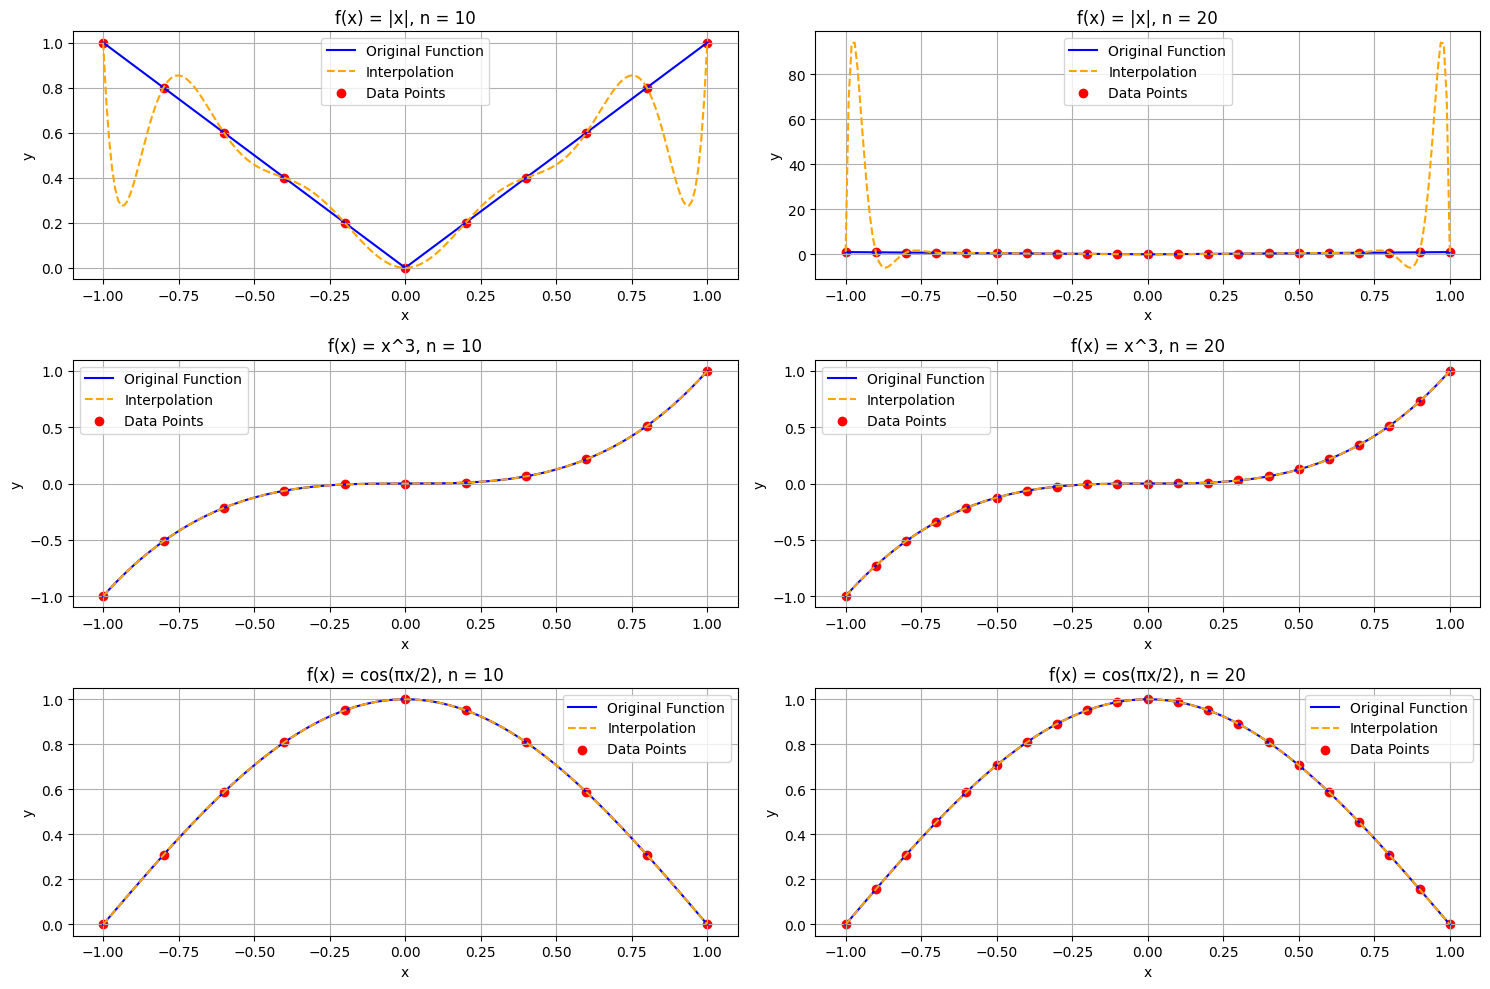

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator

# Заданные функции
functions = [
    (lambda x: np.abs(x), "f(x) = |x|"),
    (lambda x: x**3, "f(x) = x^3"),
    (lambda x: np.cos(np.pi * x / 2), "f(x) = cos(\u03c0x/2)")
]

# Настройка параметров
n_values = [10, 20]
x_range = np.linspace(-1, 1, 200)

# Создаем фигуру
fig, axes = plt.subplots(len(functions), len(n_values), figsize=(15, 10))

for row, (func, title) in enumerate(functions):
    for col, n in enumerate(n_values):
        h = 2 / n
        x_points = np.array([-1 + i * h for i in range(n + 1)])
        y_points = func(x_points)

        # Интерполяционный полином
        interpolator = BarycentricInterpolator(x_points, y_points)
        y_interp = interpolator(x_range)

        # Построение графиков
        ax = axes[row, col]
        ax.plot(x_range, func(x_range), label="Original Function", color="blue")
        ax.plot(x_range, y_interp, label="Interpolation", linestyle="--", color="orange")
        ax.scatter(x_points, y_points, color="red", label="Data Points")

        ax.set_title(f"{title}, n = {n}")
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.legend()
        ax.grid(True)

# Настройка общего заголовка и отображение
plt.tight_layout()
plt.show()


In [16]:
from scipy.interpolate import CubicSpline

# Интерполяция с использованием кубического сплайна
for row, (func, title) in enumerate(functions):
    for col, n in enumerate(n_values):
        x_points = np.linspace(-1, 1, n + 1)
        y_points = func(x_points)

        # Интерполяция с кубическим сплайном
        cs = CubicSpline(x_points, y_points)
        y_interp = cs(x_range)

        # Построение графиков
        ax = axes[row, col]
        
        # Оригинальная функция
        ax.plot(x_range, func(x_range), label="Original Function", color="blue", linewidth=2)

        # Интерполяция
        ax.plot(x_range, y_interp, label="Interpolation", linestyle="--", color="orange")

        # Точки интерполяции
        ax.scatter(x_points, y_points, color="red", label="Data Points")

        ax.set_title(f"{title}, n = {n}")
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.legend()
        ax.grid(True)

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>